In [138]:
# import necessary libraries

import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
import warnings
warnings.filterwarnings("ignore") 

In [139]:
# Import csv to read data 

data = pd.read_csv('loan-train.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [140]:
# Copy original data

ds = data.copy()
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [141]:
# check for missing values

ds.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [142]:
# handle missing values

for i in data.columns:
    if (ds[i].isnull().sum() / len(data)).round(2) * 100 < 30:
        if ds[i].dtypes != 'O':
            ds[i].fillna(ds[i].median(), inplace = True)
        else:
            ds[i].fillna(ds[i].mode()[0], inplace = True)
    else:
        ds.drop(i, axis = 1, inplace = True)

ds.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [143]:
# overview of dataframe

ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [144]:
# drop Loan_ID column

ds.drop('Loan_ID', axis = 1, inplace = True)

In [145]:
# Separate categorical and numerical columns
cats = ds.select_dtypes(exclude='number')
nums = ds.select_dtypes(include='number')

# Display the first few rows of each subset
print('Categorical Dataset')
display(cats.head())
print('\n\nNumerical Dataset')
display(nums.head())


Categorical Dataset


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y




Numerical Dataset


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [146]:
# Statistical Summary of DataFrame

ds.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [147]:
# scale columns with high std


# List of columns to be scaled
toBeScaled = ['ApplicantIncome', 'CoapplicantIncome']
scaled = {}

# Loop through each column to scale and transform it
for i in toBeScaled:
    scaler = StandardScaler()  # Instantiate the scaler
    ds[i] = scaler.fit_transform(ds[[i]])  # Transform the column
    scaled[i + '_scaled'] = scaler  # Save the scaler into a dictionary for easy access
    joblib.dump(scaler, open(f'{i}_scaler.pkl', 'wb'))  # Save the scaler into the file directory

# Display the dictionary of scalers
scaled


scaled

{'ApplicantIncome_scaled': StandardScaler(),
 'CoapplicantIncome_scaled': StandardScaler()}

In [148]:

# Encoding Categorical Columns in a Dataset

# Dictionary to store the encoders
encoded = {}

# Loop through each categorical column and encode it
for i in ds.select_dtypes(exclude='number'):  # Select all categorical variables
    encoder = LabelEncoder()  # Instantiate the encoder
    ds[i] = encoder.fit_transform(ds[i])  # Transform the variables involved
    encoded[i + '_encoder'] = encoder  # Save the encoders into a dictionary for easy access
    joblib.dump(encoder, open(f'{i}_encoder.pkl', 'wb'))  # Save the encoder into the file directory

# Display the dictionary of encoders
encoded


{'Gender_encoder': LabelEncoder(),
 'Married_encoder': LabelEncoder(),
 'Dependents_encoder': LabelEncoder(),
 'Education_encoder': LabelEncoder(),
 'Self_Employed_encoder': LabelEncoder(),
 'Property_Area_encoder': LabelEncoder(),
 'Loan_Status_encoder': LabelEncoder()}

In [149]:
# display dataframe

ds.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.072991,-0.554487,128.0,360.0,1.0,2,1
1,1,1,1,0,0,-0.134412,-0.038732,128.0,360.0,1.0,0,0
2,1,1,0,0,1,-0.393747,-0.554487,66.0,360.0,1.0,2,1
3,1,1,0,1,0,-0.462062,0.251980,120.0,360.0,1.0,2,1
4,1,0,0,0,0,0.097728,-0.554487,141.0,360.0,1.0,2,1


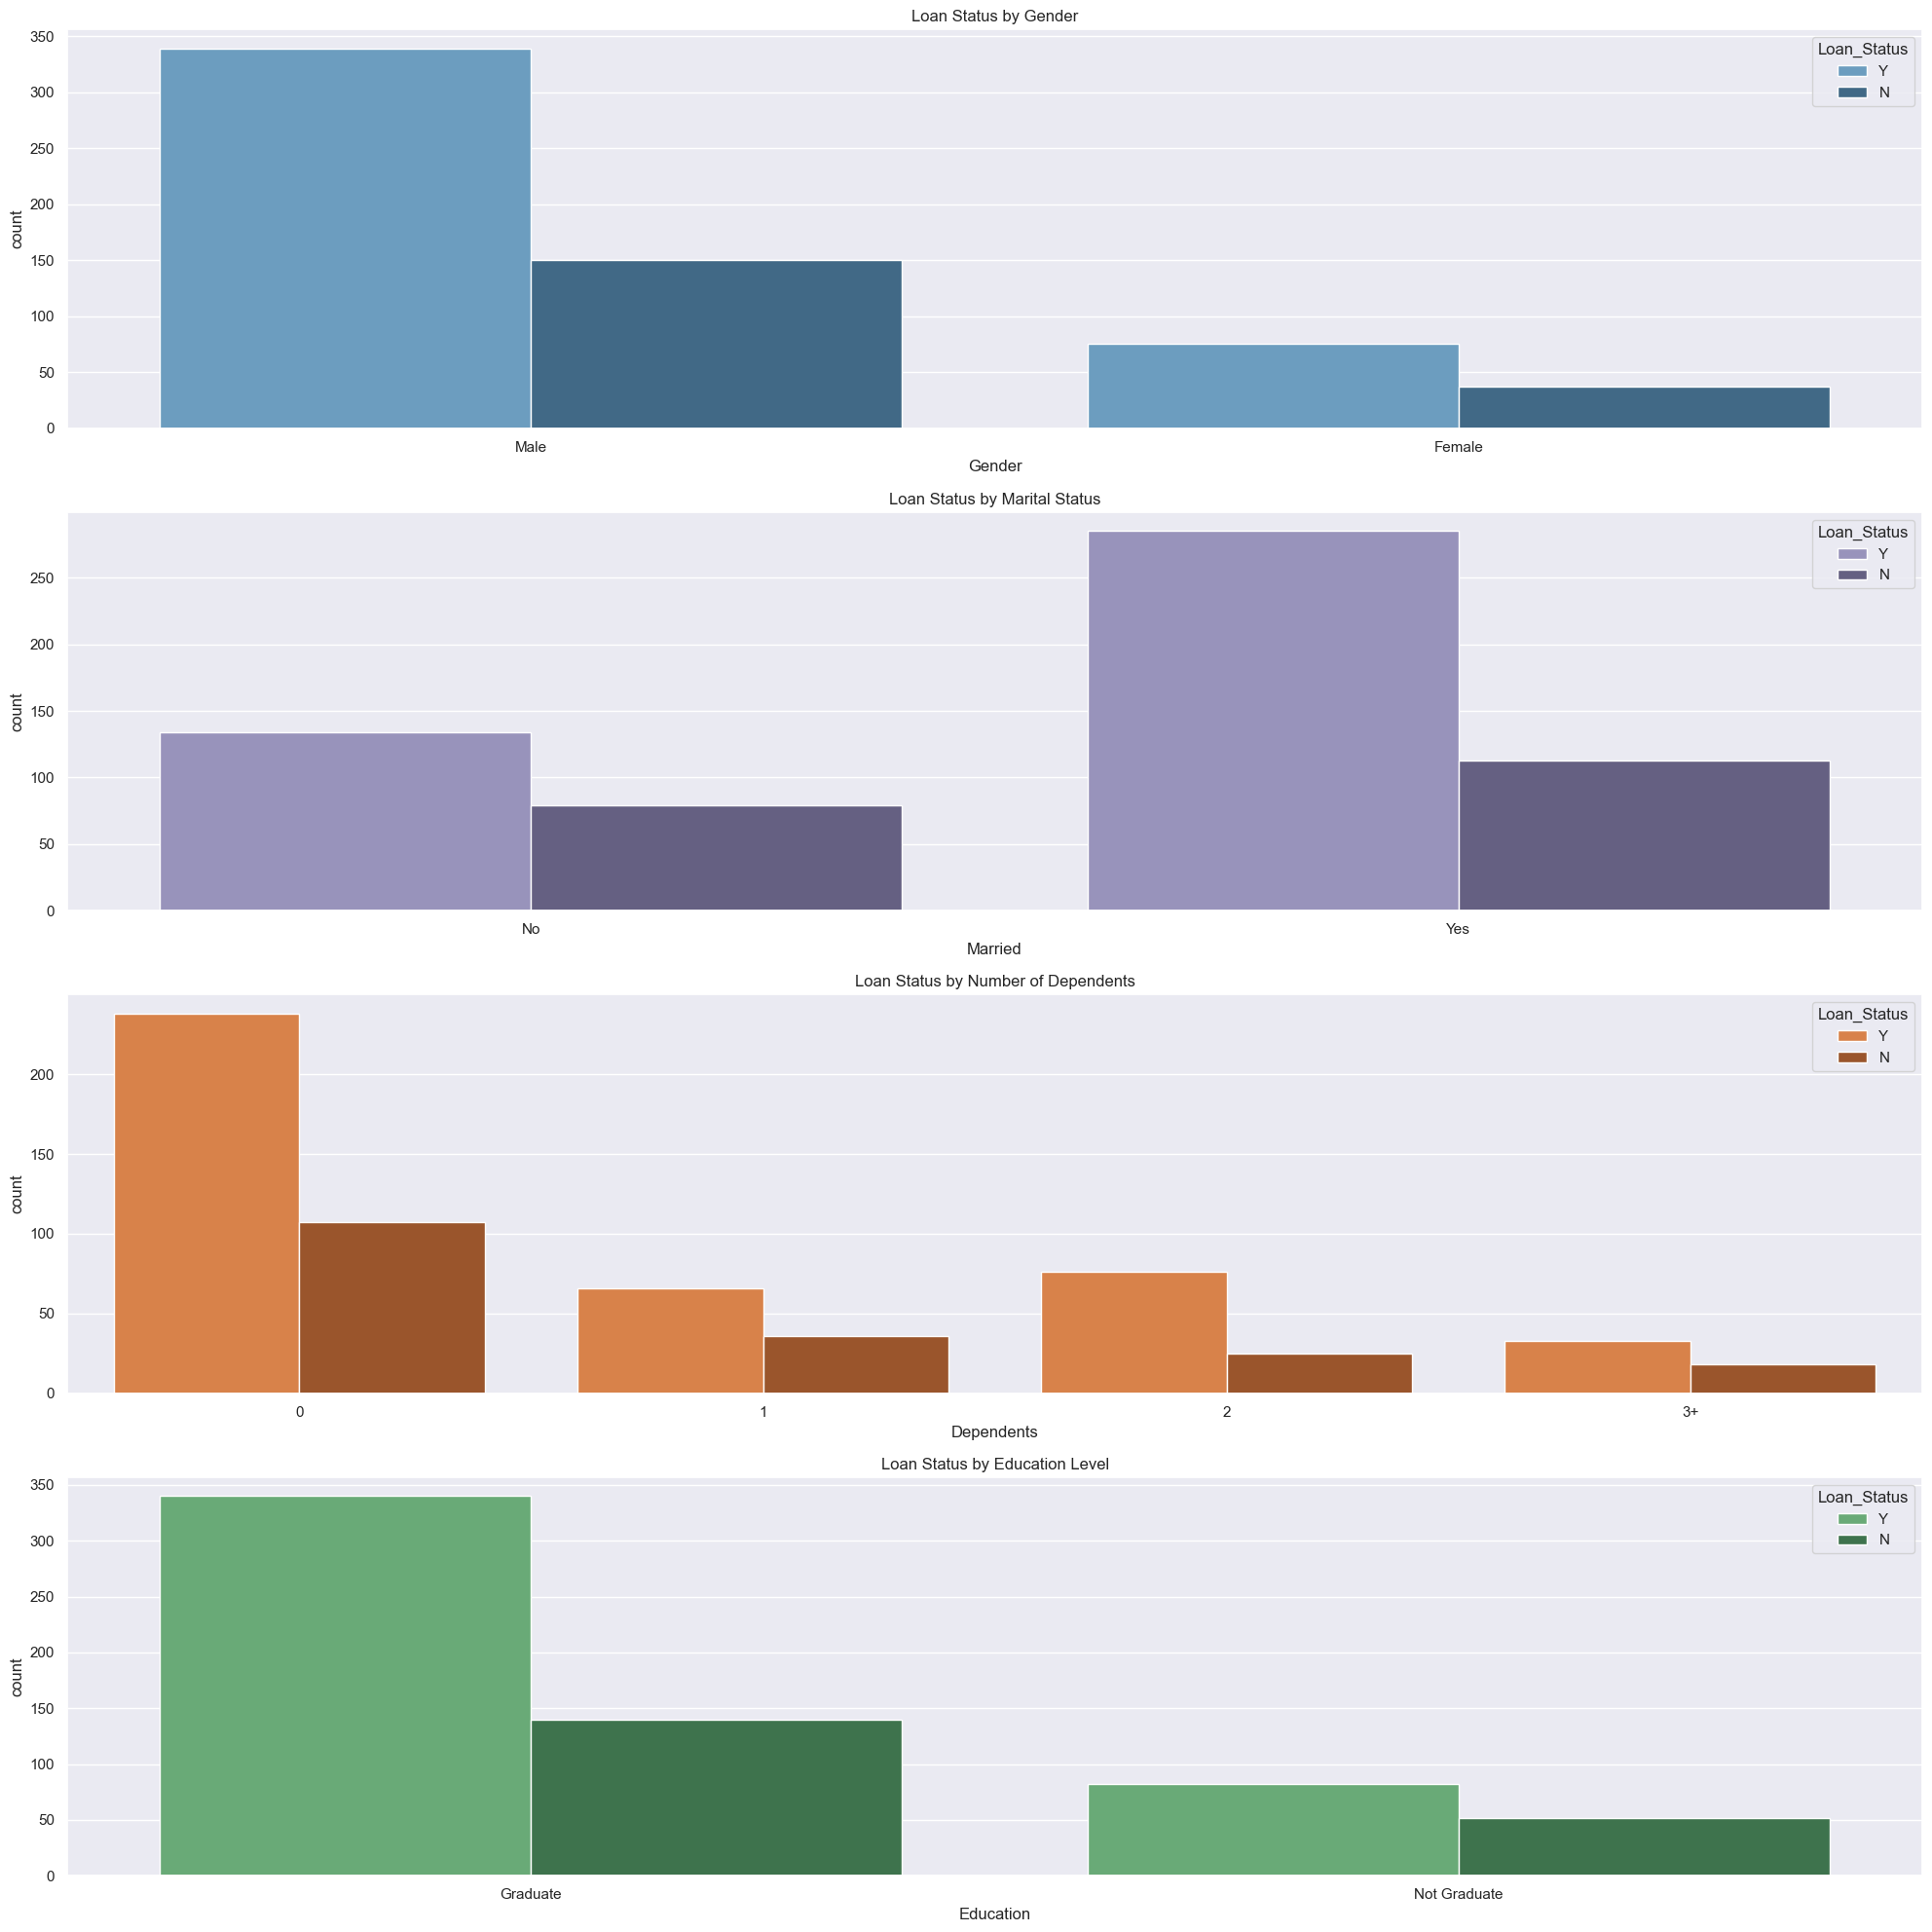

In [150]:
# Loan Status Analysis by Demographic Factors

plt.figure(figsize=(20, 20))

# Gender vs. Loan Status
plt.subplot(4, 1, 1)
sns.countplot(x='Gender', data=data, hue='Loan_Status', palette='Blues_d')
plt.title('Loan Status by Gender')

# Married vs. Loan Status
plt.subplot(4, 1, 2)
sns.countplot(x='Married', data=data, hue='Loan_Status', palette='Purples_d')
plt.title('Loan Status by Marital Status')

# Dependents vs. Loan Status
plt.subplot(4, 1, 3)
sns.countplot(x='Dependents', data=data, hue='Loan_Status', palette='Oranges_d')
plt.title('Loan Status by Number of Dependents')

# Education vs. Loan Status
plt.subplot(4, 1, 4)
sns.countplot(x='Education', data=data, hue='Loan_Status', palette='Greens_d')
plt.title('Loan Status by Education Level')

plt.tight_layout()
plt.show()


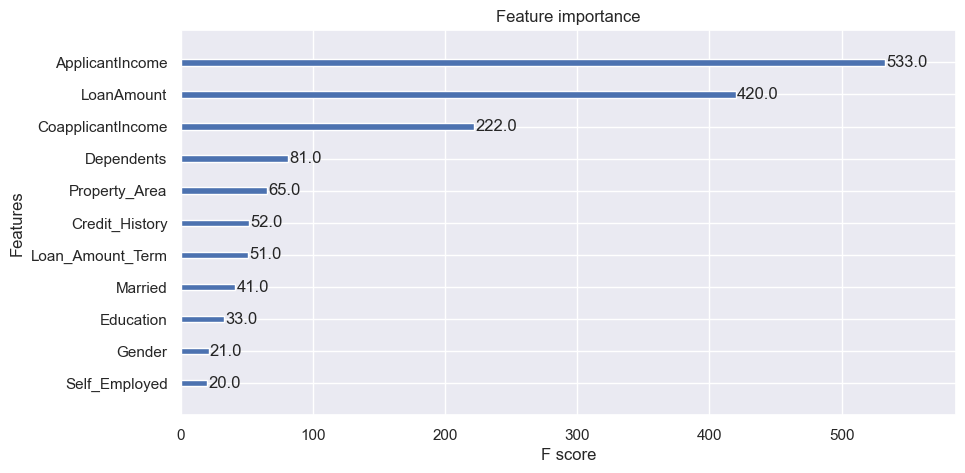

In [151]:
# Conduct Feature Selection for important columns

model = xgb.XGBClassifier()

x = ds.drop('Loan_Status', axis = 1)
y = ds.Loan_Status

model.fit(x, y)

plt.rcParams['figure.figsize'] = (10, 5)

xgb.plot_importance(model, importance_type= 'weight')
plt.show()

In [152]:
# display columns

ds.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [153]:
# Selecting Relevant Columns from Dataset

sel_columns = ['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Dependents', 'Property_Area', 'Credit_History', 'Loan_Amount_Term' , 'Loan_Status']
ds = ds[sel_columns]
ds.head()

,ApplicantIncome,LoanAmount,CoapplicantIncome,Dependents,Property_Area,Credit_History,Loan_Amount_Term,Loan_Status
0,0.072991,128.0,-0.554487,0,2,1.0,360.0,1
1,-0.134412,128.0,-0.038732,1,0,1.0,360.0,0
2,-0.393747,66.0,-0.554487,0,2,1.0,360.0,1
3,-0.462062,120.0,0.251980,0,2,1.0,360.0,1
4,0.097728,141.0,-0.554487,0,2,1.0,360.0,1


In [154]:
# Split into train and test

x = ds.drop('Loan_Status', axis = 1)
y = ds.Loan_Status

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size = 0.8, stratify = y, random_state = 45)

In [155]:
#Random Forest Classifier Model Evaluation

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rand_model = RandomForestClassifier()

rand_model.fit(xtrain, ytrain)

# Model Evaluation
cross_validation = rand_model.predict(xtrain) # ....................... Predict the training data
print(classification_report(cross_validation, ytrain)) # ........... Check the accuracy of the model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       337

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



<Axes: xlabel='Loan_Status', ylabel='count'>

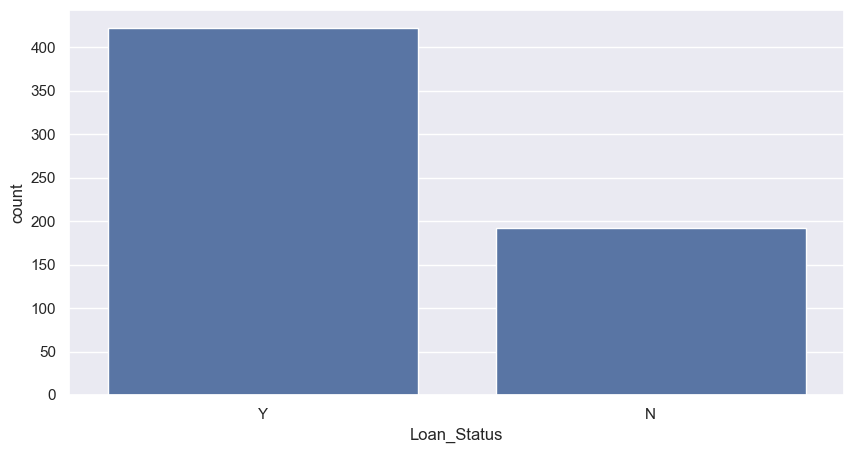

In [156]:
# Loan Status Count Distribution

sns.countplot(x = data.Loan_Status)

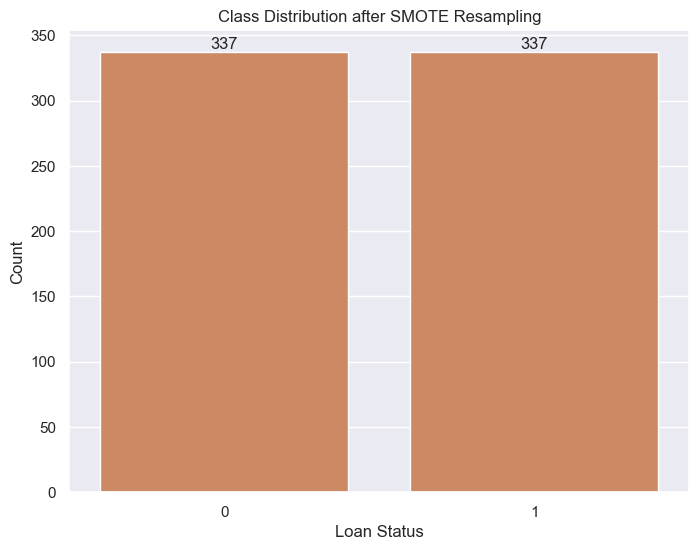

In [157]:
# ------- SMOTE resampling addresses class imbalance in classification ----

# Class Distribution Visualization after SMOTE Resampling
# Importing necessary libraries
from imblearn.over_sampling import SMOTE

# Load dataset and separate features and target variable
x = ds.drop('Loan_Status', axis=1)
y = ds['Loan_Status']

# Splitting dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, stratify=y, random_state=23)

# Applying SMOTE resampling to balance class distribution
smote = SMOTE(sampling_strategy='auto', random_state=5)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Visualizing class distribution after SMOTE resampling
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Class Distribution after SMOTE Resampling')
fig = sns.countplot(x = y_resampled)
fig.bar_label(fig.containers[0])
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


In [158]:
rand_model = RandomForestClassifier()

rand_model.fit(x_resampled, y_resampled)

# Model Evaluation
cross_validation = rand_model.predict(x_resampled) # ....................... Predict the training data
print(classification_report(cross_validation, y_resampled)) # ........... Check the accuracy of the model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       337
           1       1.00      1.00      1.00       337

    accuracy                           1.00       674
   macro avg       1.00      1.00      1.00       674
weighted avg       1.00      1.00      1.00       674



              precision    recall  f1-score   support

           0       0.82      0.97      0.89        32
           1       0.99      0.92      0.95        91

    accuracy                           0.93       123
   macro avg       0.90      0.95      0.92       123
weighted avg       0.94      0.93      0.94       123



<Axes: >

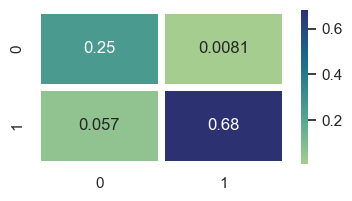

In [159]:
# Model Testing
pred = rand_model.predict(xtest)  # Predict the testing data
print(classification_report(pred, ytest))  # Print classification report

# Calculate confusion matrix
import numpy as np
revealer = confusion_matrix(pred, ytest)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(4, 2))  # Set figure size
sns.set(style='darkgrid')  # Set style
sns.heatmap(revealer / np.sum(revealer), annot=True, cmap='crest', linewidth=5)  # Create heatmap


In [160]:
# save your model

joblib.dump(rand_model, open('Loanpredictionmodel.pkl', 'wb'))

MODEL TESTING

In [161]:
import pandas as pd
import joblib

# Load the test data
test_data = pd.read_csv('loan-train.csv')

In [162]:
test_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [164]:
# Handle missing values

for i in test_data.columns:
    if (test_data[i].isnull().sum() / len(test_data)).round(2) * 100 < 30:
        if test_data[i].dtypes != 'O':
            test_data[i].fillna(test_data[i].median(), inplace = True)
        else:
            test_data[i].fillna(test_data[i].mode()[0], inplace = True)
    else:
        test_data.drop(i, axis = 1, inplace = True)

test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [165]:
# Load the saved scalers and encoders
app_income_scaler = joblib.load('ApplicantIncome_scaler.pkl')
co_app_scaler = joblib.load('CoapplicantIncome_scaler.pkl')
deps_encoder = joblib.load('Dependents_encoder.pkl')
prop_area_encoder = joblib.load('Property_Area_encoder.pkl')
model = joblib.load('Loanpredictionmodel.pkl')

In [167]:

# Apply scalers to numeric features
test_data['ApplicantIncome'] = app_income_scaler.transform(test_data[['ApplicantIncome']])
test_data['CoapplicantIncome'] = co_app_scaler.transform(test_data[['CoapplicantIncome']])

In [168]:
# Apply encoders to categorical features
deps_encoded = deps_encoder.transform(test_data['Dependents']).reshape(-1, 1)
prop_area_encoded = prop_area_encoder.transform(test_data['Property_Area']).reshape(-1, 1)

In [169]:
# Convert encoded categorical features to DataFrame
test_data['Dependents'] = deps_encoded
test_data['Property_Area'] = prop_area_encoded


In [170]:

# Ensure the order of columns matches the training data
feature_order = ['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Dependents', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
test_data_preprocessed = test_data[feature_order]

In [171]:
# Make predictions on the preprocessed test data
predictions = model.predict(test_data_preprocessed)


In [172]:
# Add predictions to the test data
test_data['Predictions'] = predictions

In [173]:
# Save predictions to a CSV file
test_data.to_csv('predictions_with_originaldata.csv', index=False)

In [174]:
# Display original data with predictions

data = pd.read_csv('predictions_with_originaldata.csv')
data.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Predictions
0,LP001002,Male,No,0,Graduate,No,0.072991,-0.554487,128.0,360.0,1.0,2,Y,1
1,LP001003,Male,Yes,1,Graduate,No,-0.134412,-0.038732,128.0,360.0,1.0,0,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,-0.393747,-0.554487,66.0,360.0,1.0,2,Y,1
3,LP001006,Male,Yes,0,Not Graduate,No,-0.462062,0.251980,120.0,360.0,1.0,2,Y,1
4,LP001008,Male,No,0,Graduate,No,0.097728,-0.554487,141.0,360.0,1.0,2,Y,1
5,LP001011,Male,Yes,2,Graduate,Yes,0.002218,0.880600,267.0,360.0,1.0,2,Y,1
6,LP001013,Male,Yes,0,Not Graduate,No,-0.503019,-0.035995,95.0,360.0,1.0,2,Y,1
7,LP001014,Male,Yes,3,Graduate,No,-0.387850,0.301914,158.0,360.0,0.0,1,N,0
8,LP001018,Male,Yes,2,Graduate,No,-0.228939,-0.032575,168.0,360.0,1.0,2,Y,1
9,LP001020,Male,Yes,1,Graduate,No,1.218457,3.196713,349.0,360.0,1.0,1,N,0


In [175]:
data = pd.read_csv('predictions_with_test_data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predictions
0,LP001015,Male,Yes,0,Graduate,No,0.051857,-0.554487,110.0,360.0,1.0,2,1
1,LP001022,Male,Yes,1,Graduate,No,-0.381297,-0.041468,126.0,360.0,1.0,2,1
2,LP001031,Male,Yes,2,Graduate,No,-0.066097,0.061136,208.0,360.0,1.0,2,1
3,LP001035,Male,Yes,2,Graduate,No,-0.501872,0.316278,100.0,360.0,1.0,2,1
4,LP001051,Male,No,0,Not Graduate,No,-0.348532,-0.554487,78.0,360.0,1.0,2,1
